In [ ]:
from google.colab import files
uploaded = files.upload()  


Saving Car parts.v1i.coco.zip to Car parts.v1i.coco.zip


In [2]:
import zipfile
import os

zip_path = next(iter(uploaded))
extract_dir = "/content/dataset"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

print("Unzipped to:", extract_dir)


Unzipped to: /content/dataset


In [ ]:
import json
import os
from collections import defaultdict


json_path = "/content/dataset/train/_annotations.coco.json"  

target_parts = {
    "Front bumper": "bumper",
    "Rear bumper": "bumper",
    "Headlight - -L-": "headlight",
    "Headlight - -R-": "headlight",
    "Driver-s door - -F-R-": "door",
    "Passenger-s door - -F-L-": "door",
    "Passenger-s door - -R-L-": "door",
    "Passenger-s door - -R-R-": "door",
    "Fender - -F-L-": "wheel",
    "Fender - -F-R-": "wheel",
    "Fender - -R-L-": "wheel",
    "Fender - -R-R-": "wheel",
    "Car license plate": "license_plate" }

with open(json_path, 'r') as f:
    coco = json.load(f)


cat_id_to_name = {cat['id']: cat['name'] for cat in coco['categories']}


image_id_to_filename = {img['id']: img['file_name'] for img in coco['images']}


image_part_labels = defaultdict(lambda: {part: 0 for part in set(target_parts.values())})


for ann in coco['annotations']:
    image_id = ann['image_id']
    category_id = ann['category_id']
    cat_name = cat_id_to_name[category_id]

    if cat_name in target_parts:
        part_name = target_parts[cat_name]
        image_filename = image_id_to_filename[image_id]
        image_part_labels[image_filename][part_name] = 1


final_labels = []
for fname, label_dict in image_part_labels.items():
    final_labels.append({
        "file_name": fname,
        "labels": label_dict
    })


from pprint import pprint
pprint(final_labels[:3])


[{'file_name': 'rotate90_honda_cars-341-_jpg.rf.1687c2e228933ef9b3ec82c2c2d68a08.jpg',
  'labels': {'bumper': 1,
             'door': 1,
             'headlight': 1,
             'license_plate': 0,
             'wheel': 1}},
 {'file_name': 'low_pass_honda_cars-453-_jpg.rf.16bcc65f64645a0ddad8c9ef62f1da65.jpg',
  'labels': {'bumper': 1,
             'door': 0,
             'headlight': 1,
             'license_plate': 0,
             'wheel': 0}},
 {'file_name': 'rotate180_honda_cars-249-_jpg.rf.16c1aedb02e5d0209ba999f90a47e0d9.jpg',
  'labels': {'bumper': 1,
             'door': 0,
             'headlight': 1,
             'license_plate': 0,
             'wheel': 1}}]


In [ ]:
import json
import os
import pandas as pd
from collections import defaultdict


valid_json_path = "/content/dataset/valid/_annotations.coco.json"
valid_image_dir = "/content/dataset/valid"

target_parts = {
    "Front bumper": "bumper",
    "Rear bumper": "bumper",
    "Headlight - -L-": "headlight",
    "Headlight - -R-": "headlight",
    "Driver-s door - -F-R-": "door",
    "Passenger-s door - -F-L-": "door",
    "Passenger-s door - -R-L-": "door",
    "Passenger-s door - -R-R-": "door",
    "Fender - -F-L-": "wheel",
    "Fender - -F-R-": "wheel",
    "Fender - -R-L-": "wheel",
    "Fender - -R-R-": "wheel",
    "Car license plate": "license_plate"
}

with open(valid_json_path, 'r') as f:
    coco = json.load(f)


cat_id_to_name = {cat['id']: cat['name'] for cat in coco['categories']}
image_id_to_filename = {img['id']: img['file_name'] for img in coco['images']}


image_part_labels = defaultdict(lambda: {part: 0 for part in set(target_parts.values())})

for ann in coco['annotations']:
    image_id = ann['image_id']
    category_id = ann['category_id']
    cat_name = cat_id_to_name[category_id]

    if cat_name in target_parts:
        part_name = target_parts[cat_name]
        filename = image_id_to_filename[image_id]
        image_part_labels[filename][part_name] = 1


final_labels = []
for fname, labels in image_part_labels.items():
    final_labels.append({
        "file_name": fname,
        "labels": labels
    })

df_valid = pd.DataFrame(final_labels)
df_valid['image_path'] = df_valid['file_name'].apply(lambda x: os.path.join(valid_image_dir, x))
df_valid = pd.concat([df_valid.drop(['labels'], axis=1), df_valid['labels'].apply(pd.Series)], axis=1)

df_valid.to_csv("valid_labels.csv", index=False)
df_valid.head()


,file_name,image_path,door,headlight,license_plate,wheel,bumper
0,resized_honda_cars-136-_jpg.rf.033d97c73fe962f...,/content/dataset/valid/resized_honda_cars-136-...,1,1,0,1,1
1,rotate180_honda_cars-459-_jpg.rf.034ddfa677d03...,/content/dataset/valid/rotate180_honda_cars-45...,1,1,0,1,1
2,rotate180_honda_cars-195-_jpg.rf.042f8c6bdd9ba...,/content/dataset/valid/rotate180_honda_cars-19...,1,1,0,1,1
3,gray_honda_cars-121-_jpg.rf.015169849247a417c0...,/content/dataset/valid/gray_honda_cars-121-_jp...,1,1,0,1,1
4,high_pass_honda_cars-383-_jpg.rf.044decfe5e842...,/content/dataset/valid/high_pass_honda_cars-38...,0,1,0,0,1


In [ ]:
import pandas as pd

df = pd.DataFrame(final_labels)
df['image_path'] = df['file_name'].apply(lambda x: os.path.join("/content/dataset/train", x))
df = pd.concat([df.drop(['labels'], axis=1), df['labels'].apply(pd.Series)], axis=1)

df.to_csv("train_labels.csv", index=False)
df.head()


,file_name,image_path,door,headlight,license_plate,wheel,bumper
0,rotate90_honda_cars-341-_jpg.rf.1687c2e228933e...,/content/dataset/train/rotate90_honda_cars-341...,1,1,0,1,1
1,low_pass_honda_cars-453-_jpg.rf.16bcc65f64645a...,/content/dataset/train/low_pass_honda_cars-453...,0,1,0,0,1
2,rotate180_honda_cars-249-_jpg.rf.16c1aedb02e5d...,/content/dataset/train/rotate180_honda_cars-24...,0,1,0,1,1
3,flip_vhonda_cars-212-_jpg.rf.17121b699da61509c...,/content/dataset/train/flip_vhonda_cars-212-_j...,0,1,0,0,1
4,rotate90_honda_cars-149-_jpg.rf.1725df9bb593c2...,/content/dataset/train/rotate90_honda_cars-149...,1,1,0,1,1


In [ ]:
import tensorflow as tf
import pandas as pd
import os

df = pd.read_csv("/content/train_labels.csv")

img_dir = "/content/dataset/train"

filepaths = df['image_path'].values
labels = df[['wheel', 'door', 'headlight', 'bumper', 'license_plate']].values

IMG_SIZE = 224  
BATCH_SIZE = 32
AUTOTUNE = tf.data.AUTOTUNE

def preprocess_image(filename, label):
    image = tf.io.read_file(filename)
    image = tf.image.decode_jpeg(image, channels=3)  
    image = tf.image.resize(image, [IMG_SIZE, IMG_SIZE])
    image = image / 255.0  
    return image, label

dataset = tf.data.Dataset.from_tensor_slices((filepaths, labels))
dataset = dataset.map(preprocess_image, num_parallel_calls=AUTOTUNE)
dataset = dataset.shuffle(1000).batch(BATCH_SIZE).prefetch(AUTOTUNE)


In [ ]:
from tensorflow.keras import layers, models, applications

base_model = applications.MobileNetV2(
    input_shape=(IMG_SIZE, IMG_SIZE, 3),
    include_top=False,
    weights='imagenet'
)

base_model.trainable = False  

model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(5, activation='sigmoid')  
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.summary()


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,422,597 (9.24 MB)

 Trainable params: 164,613 (643.02 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [8]:
EPOCHS = 10

history = model.fit(
    dataset,
    epochs=EPOCHS,
    verbose=1
)


Epoch 1/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 22s 102ms/step - accuracy: 0.0785 - loss: 0.2842
Epoch 2/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 8s 67ms/step - accuracy: 0.1198 - loss: 0.1258
Epoch 3/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 6s 52ms/step - accuracy: 0.1382 - loss: 0.0948
Epoch 4/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 9s 80ms/step - accuracy: 0.1288 - loss: 0.0880
Epoch 5/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 6s 54ms/step - accuracy: 0.1252 - loss: 0.0790
Epoch 6/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 7s 53ms/step - accuracy: 0.1201 - loss: 0.0669
Epoch 7/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 7s 58ms/step - accuracy: 0.1315 - loss: 0.0576
Epoch 8/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 6s 52ms/step - accuracy: 0.1477 - loss: 0.0562
Epoch 9/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 8s 68ms/step - accuracy: 0.1375 - loss: 0.0535
Epoch 10/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 6s 53ms/step - accuracy: 0.1481 - loss: 0.0484


In [ ]:
import pandas as pd

df = pd.read_csv("/content/train_labels.csv")
valid_image_path = df['image_path'].iloc[0]  

print(predict_image(valid_image_path))


In [ ]:
def predict_image(image_path):
    img = tf.io.read_file(image_path)
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.resize(img, [IMG_SIZE, IMG_SIZE])
    img = img / 255.0
    img = tf.expand_dims(img, axis=0)  

    preds = model.predict(img)[0]
    parts = ['wheel', 'door', 'headlight', 'bumper', 'license_plate']
    result = {part: float(preds[i]) for i, part in enumerate(parts)}
    return result

print(predict_image("/content/dataset/train/rotate180_honda_cars-196-_jpg.rf.db38c173255867a38720d2dc5d87f00c.jpg"))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
{'wheel': 0.01183018833398819, 'door': 0.01191891822963953, 'headlight': 0.9999812841415405, 'bumper': 0.999763548374176, 'license_plate': 4.7777848521946e-06}


In [10]:
import os

print("Some images in train folder:")
print(os.listdir("/content/dataset/train")[:10])


Some images in train folder:
['flip_90honda_cars-239-_jpg.rf.3472d7b360baac8c5062599c3afd1afb.jpg', 'rotate180_honda_cars-196-_jpg.rf.db38c173255867a38720d2dc5d87f00c.jpg', 'gray_honda_cars-29-_jpg.rf.c5008324a1309fe81bc30f6b7dda01bb.jpg', 'flip_90honda_cars-536-_jpg.rf.2c992a2f28fed6889cbf1d99af24c100.jpg', 'low_pass_honda_cars-64-_jpg.rf.19938573c445518005fa766f927795c4.jpg', 'gray_honda_cars-161-_jpg.rf.db08fdc0e9cc5a468e7e3c9c1aff88a1.jpg', 'dst_honda_cars-388-_jpg.rf.4fbe5e9f067169e5dc067d8da85f3e1a.jpg', 'flip_vhonda_cars-312-_jpg.rf.aa9523b8dfcafa9e14786c5f414fb444.jpg', 'flip_90honda_cars-376-_jpg.rf.f859f101669e9f0facf4c93656eaf64c.jpg', 'resized_honda_cars-25-_jpg.rf.318e402a4725877f26f4564f71b4b368.jpg']


In [16]:
print(df['license_plate'].value_counts())


license_plate
0    2787
Name: count, dtype: int64


In [ ]:
import pandas as pd

df = pd.read_csv("/content/train_labels.csv")

for idx, row in df.head(5).iterrows():  
    img_path = row['image_path']
    preds = predict_image(img_path)
    if preds:
        print(f"{os.path.basename(img_path)} -> {preds}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
rotate90_honda_cars-341-_jpg.rf.1687c2e228933ef9b3ec82c2c2d68a08.jpg -> {'wheel': 0.9845446348190308, 'door': 0.9917317032814026, 'headlight': 0.9972729086875916, 'bumper': 0.9981988072395325, 'license_plate': 1.3709945960727055e-05}
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
low_pass_honda_cars-453-_jpg.rf.16bcc65f64645a0ddad8c9ef62f1da65.jpg -> {'wheel': 0.0056653451174497604, 'door': 0.0010746419429779053, 'headlight': 0.9996898174285889, 'bumper': 0.9998175501823425, 'license_plate': 5.835545380250551e-05}
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
rotate180_honda_cars-249-_jpg.rf.16c1aedb02e5d0209ba999f90a47e0d9.jpg -> {'wheel': 0.764743447303772, 'door': 0.26716452836990356, 'headlight': 0.9698842167854309, 'bumper': 0.9921054840087891, 'license_plate': 0.00036537364940159023}
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
flip_vhonda_cars-212-_jpg.rf.17121b699da61509c150111132d4dcca.jpg -> {'wheel': 0.0038957016076892614, 'door': 0.0035826556850224733, 'headli

In [ ]:
import pandas as pd


val_df = pd.read_csv("/content/valid_labels.csv")

parts = ['wheel', 'door', 'headlight', 'bumper', 'license_plate']
val_df = val_df[['image_path'] + parts]

val_df.head()


,image_path,wheel,door,headlight,bumper,license_plate
0,/content/dataset/valid/resized_honda_cars-136-...,1,1,1,1,0
1,/content/dataset/valid/rotate180_honda_cars-45...,1,1,1,1,0
2,/content/dataset/valid/rotate180_honda_cars-19...,1,1,1,1,0
3,/content/dataset/valid/gray_honda_cars-121-_jp...,1,1,1,1,0
4,/content/dataset/valid/high_pass_honda_cars-38...,0,0,1,1,0


In [ ]:
import tensorflow as tf

IMG_SIZE = 224  

def parse_image(filename, labels):
    image = tf.io.read_file(filename)
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, [IMG_SIZE, IMG_SIZE])
    image = image / 255.0
    return image, labels


val_ds = tf.data.Dataset.from_tensor_slices((
    val_df['image_path'].values,
    val_df[parts].values
))

val_ds = val_ds.map(parse_image).batch(32)


In [ ]:
import numpy as np
from sklearn.metrics import classification_report, accuracy_score


y_pred_probs = model.predict(val_ds)
y_pred = (y_pred_probs > 0.5).astype(int)

y_true = val_df[parts].values

print("Classification Report:\n")
print(classification_report(y_true, y_pred, target_names=parts))


exact_match_acc = np.mean(np.all(y_pred == y_true, axis=1))
print(f"\nExact Match Accuracy: {exact_match_acc:.4f}")


11/11 ━━━━━━━━━━━━━━━━━━━━ 11s 501ms/step
Classification Report:

               precision    recall  f1-score   support

        wheel       0.94      0.98      0.96       236
         door       0.98      0.99      0.98       243
    headlight       0.97      0.98      0.97       274
       bumper       0.99      1.00      1.00       323
license_plate       0.00      0.00      0.00         0

    micro avg       0.97      0.99      0.98      1076
    macro avg       0.77      0.79      0.78      1076
 weighted avg       0.97      0.99      0.98      1076
  samples avg       0.97      0.99      0.98      1076


Exact Match Accuracy: 0.8773


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


⚠️ Skipping license_plate: no positive samples in validation set.


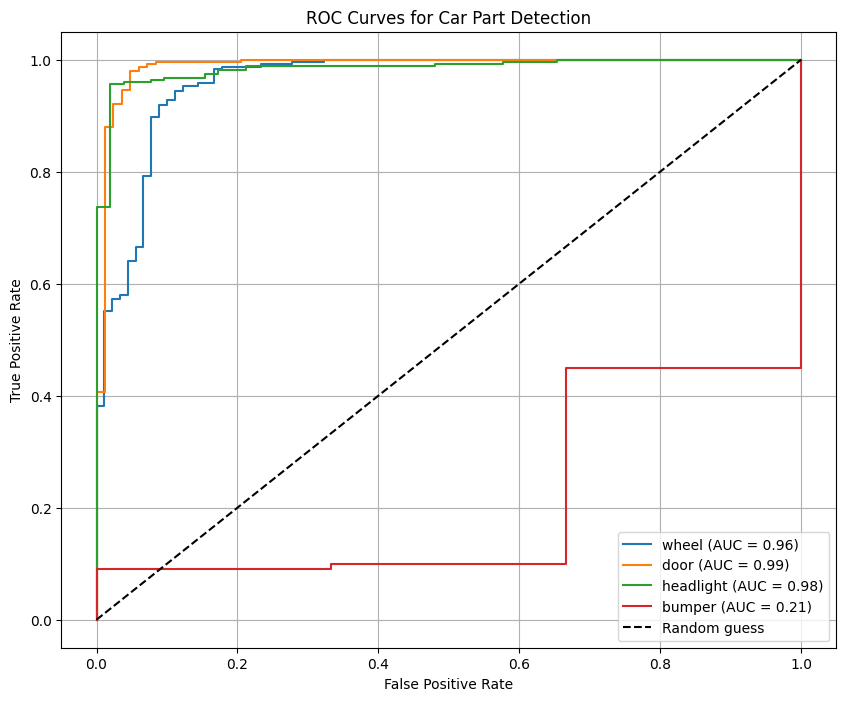

In [ ]:
import json
import os
from collections import defaultdict
import pandas as pd


json_path = "/content/dataset/test/_annotations.coco.json"


target_parts = {
    "Front bumper": "bumper",
    "Rear bumper": "bumper",
    "Headlight - -L-": "headlight",
    "Headlight - -R-": "headlight",
    "Driver-s door - -F-R-": "door",
    "Passenger-s door - -F-L-": "door",
    "Passenger-s door - -R-L-": "door",
    "Passenger-s door - -R-R-": "door",
    "Fender - -F-L-": "wheel",
    "Fender - -F-R-": "wheel",
    "Fender - -R-L-": "wheel",
    "Fender - -R-R-": "wheel",
    "Car license plate": "license_plate"
}

with open(json_path, 'r') as f:
    coco = json.load(f)

cat_id_to_name = {cat['id']: cat['name'] for cat in coco['categories']}
image_id_to_filename = {img['id']: img['file_name'] for img in coco['images']}

image_part_labels = defaultdict(lambda: {part: 0 for part in set(target_parts.values())})

for ann in coco['annotations']:
    image_id = ann['image_id']
    category_id = ann['category_id']
    cat_name = cat_id_to_name[category_id]

    if cat_name in target_parts:
        part_name = target_parts[cat_name]
        image_filename = image_id_to_filename[image_id]
        image_part_labels[image_filename][part_name] = 1

final_labels = []
for fname, label_dict in image_part_labels.items():
    final_labels.append({
        "file_name": fname,
        "labels": label_dict
    })

df = pd.DataFrame(final_labels)
df['image_path'] = df['file_name'].apply(lambda x: os.path.join("/content/dataset/test", x))
df = pd.concat([df.drop(['labels'], axis=1), df['labels'].apply(pd.Series)], axis=1)

df.to_csv("test_labels.csv", index=False)
df.head()


,file_name,image_path,door,headlight,license_plate,wheel,bumper
0,rotate180_honda_cars-188-_jpg.rf.0224cb26b9521...,/content/dataset/test/rotate180_honda_cars-188...,0,1,0,1,1
1,high_pass_honda_cars-541-_jpg.rf.03870b7e6db54...,/content/dataset/test/high_pass_honda_cars-541...,1,0,0,1,1
2,low_pass_honda_cars-426-_jpg.rf.044c2a9703c089...,/content/dataset/test/low_pass_honda_cars-426-...,1,1,0,1,1
3,rotate180_honda_cars-84-_jpg.rf.053bb411d396ce...,/content/dataset/test/rotate180_honda_cars-84-...,0,1,0,0,1
4,flip_vhonda_cars-422-_jpg.rf.0839a481538c17b9a...,/content/dataset/test/flip_vhonda_cars-422-_jp...,1,1,0,1,1


In [ ]:
import pandas as pd

test_df = pd.read_csv("/content/test_labels.csv")

parts = ['wheel', 'door', 'headlight', 'bumper', 'license_plate']

test_df = test_df[['image_path'] + parts]
test_df.head()


,image_path,wheel,door,headlight,bumper,license_plate
0,/content/dataset/test/rotate180_honda_cars-188...,1,0,1,1,0
1,/content/dataset/test/high_pass_honda_cars-541...,1,1,0,1,0
2,/content/dataset/test/low_pass_honda_cars-426-...,1,1,1,1,0
3,/content/dataset/test/rotate180_honda_cars-84-...,0,0,1,1,0
4,/content/dataset/test/flip_vhonda_cars-422-_jp...,1,1,1,1,0


In [ ]:
import tensorflow as tf

IMG_SIZE = 224  

def parse_image(filename, labels):
    image = tf.io.read_file(filename)
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, [IMG_SIZE, IMG_SIZE])
    image = image / 255.0
    return image, labels

test_ds = tf.data.Dataset.from_tensor_slices((
    test_df['image_path'].values,
    test_df[parts].values
)).map(parse_image).batch(32)


In [ ]:
from sklearn.metrics import classification_report, accuracy_score
import numpy as np

y_test_probs = model.predict(test_ds)
y_test_preds = (y_test_probs > 0.5).astype(int)

y_test_true = test_df[parts].values

print("Classification Report on Test Set:\n")
print(classification_report(y_test_true, y_test_preds, target_names=parts))

exact_match_acc = np.mean(np.all(y_test_preds == y_test_true, axis=1))
print(f"\nExact Match Accuracy: {exact_match_acc:.4f}")


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step
Classification Report on Test Set:

               precision    recall  f1-score   support

        wheel       0.93      0.96      0.95       132
         door       0.98      0.99      0.98       134
    headlight       0.97      0.97      0.97       148
       bumper       0.99      1.00      1.00       165
license_plate       0.00      0.00      0.00         0

    micro avg       0.97      0.98      0.98       579
    macro avg       0.78      0.78      0.78       579
 weighted avg       0.97      0.98      0.98       579
  samples avg       0.97      0.98      0.97       579


Exact Match Accuracy: 0.8373


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


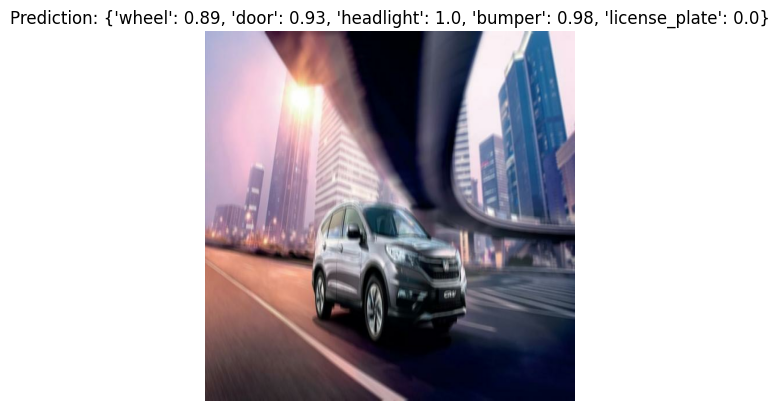

In [ ]:
import matplotlib.pyplot as plt

img_path = test_df['image_path'].iloc[2]

img_raw = tf.io.read_file(img_path)
img = tf.image.decode_jpeg(img_raw, channels=3)
img_resized = tf.image.resize(img, [224, 224]) / 255.0


pred = model.predict(tf.expand_dims(img_resized, axis=0))[0]
parts = ['wheel', 'door', 'headlight', 'bumper', 'license_plate']
result = {part: float(pred[i]) for i, part in enumerate(parts)}

plt.imshow(img.numpy().astype("uint8"))
plt.axis("off")
plt.title("Prediction: " + str({k: round(v, 2) for k, v in result.items()}))
plt.show()


In [40]:
from google.colab import drive
drive.mount('/content/drive')

ValueError: Mountpoint must not already contain files

In [46]:
model.save('car_parts_model.h5')

In [45]:
model.save("/content/drive/MyDrive/car_parts_model.h5")

In [42]:
import os
if os.path.exists('/content/drive'):
    !rm -r /content/drive